## TP Séparateurs à Vaste Marge
### 1 Données

In [1]:
import numpy as np
import breastcancerutils as b
x,y=b.load_breastcancer('wdbcM1B0.data')
x.shape

(569, 30)

### 2 Méthode du sous-gradient
#### Question 2.1
\begin{align*}
\min_{v\in R^m,a\in R,\xi\in R^n} \quad & \frac{1}{2}\sum_{j=1}^{m}v_j^2+c\sum_{i=1}^{n}\xi_i \tag{1} \\
   & \xi_i\geq 0,\ \forall i\in \{1,...,n\}  \\
   & \xi_i\geq 1-y_i(x_i^T v+a),\,\forall i\in \{1,...,n\}
\end{align*}
where c=1.
Let's define 
\begin{align*}
     f(\xi)= & c \sum_{i=1}^n \xi_i, \\   
   & \xi_i\geq 0,\ \forall i\in \{1,...,n\}  \\
   & \xi_i\geq 1-y_i(x_i^T v+a),\,\forall i\in \{1,...,n\}
\end{align*}
We have:
$$\frac{\partial f(\xi)}{\partial (\xi_i)}=c=1>0$$
So $$arg \min f(\xi_i)=\min \xi_i=\max (0,1-y_i(x_i^T v+a))$$
So the problem (1) becomes:
$$\min_{v\in R^m,a\in R}  \frac{1}{2}\sum_{j=1}^{m}v_j^2+c\sum_{i=1}^{n} \max (0,1-y_i(x_i^T v+a)) \tag{2}$$

#### Question 2.2
![title](2.2.jpg)

#### Question 2.3
We define 
\begin{align*}
 &M:R^p\times R \to R^n \quad (v,a) \to (y_i(<x_i,v>)+a))_{i=1}^n \\
&H:R^n \to R \quad (u_i)_{i=1}^n \to \sum_{i=1}^n \max(0,1-u_i),{where \quad u_i=M_i(v,a)}\\
&N:R^p\times R \to R^n \quad (v,a) \to \sum_{i=1}^m \frac{1}{2} v_i^2
\end{align*}
So we get:
\begin{align*}
&\partial f(v,a)=\partial N(v,a)+cM^T\partial H(M(v,a)) \\
&\partial N=v_1 \times v_2 \times ... \times V_m \times \{0\} \\
&\partial H=\partial h_1(y_i(<x_i,v>)+a)) \times ... \times h_n(y_n(<x_n,v>)+a))
\end{align*}

#### Question 2.4

In [104]:
def h(z):
    return max(0,1-z)
def dh(z):
    if z<1: return -1
    if z>1: return 0
    return -np.random.random()
def f(v,a,x,y):
    result=0
    n=y.size
    for i in range(v.size):
        result+=v[i]**2/2
    for i in range(n):
        ui=y[i]*(np.dot(x[i],v)+a)
        result+=h(ui)
    return result
def df(v,a,x,y):
    d1=[]
    for i in range(v.size):
        d1.append(v[i])
    d1.append(0)
    d1=np.array(d1)
    n=y.size
    p=v.size
    u=np.zeros(n)
    u2=[]
    for i in range(n):
        u[i]=y[i]*(np.dot(x[i],v)+a)
        u2.append(dh(u[i]))
    u2=np.array(u2)
    d2_a=0
    d2=np.zeros(p)
    for i in range(n):
        d2+=u2[i]*y[i]*x[i]
        d2_a+=u2[i]*y[i]
    d2=np.append(d2,d2_a)
    return d1+d2

#### Question 2.5

In [140]:
import matplotlib.pyplot as plt
v=np.zeros(30)
a=0
time=1000
loss=[]
for i in range(time):
    step=1/(i+1)
    gk=df(v,a,x,y)
    vt=gk[0:30]
    at=gk[30]
    v=v-step*vt
    a=a-step*at
    loss.append(f(v,a,x,y))
    print(f(v,a,x,y))

1342660.7300801538
330425.43539915426
144333.32720390407
79882.64470651692
51153.63046180325
35927.36535068072
26934.657072011003
21200.55931006957
17325.93983800699
14544.814437032934
12492.729423167699
10938.175131687942
9724.04667938568
8772.940219485952
7996.3773195499225
7355.123040384058
6828.111660571954
6385.4767268978685
6014.1106618714075
5691.976883657878
5409.109717142309
5167.806579670876
4959.086800249372
4773.758717942126
4606.37694534655
4455.345892822904
4317.84996711944
4192.880237309982
4076.581498858833
3967.950475851439
3866.134516522899
3770.781252999189
3680.5919086882996
3595.283974117988
3514.84789878099
3438.5562225038843
3365.882708384648
3296.6380646089005
3230.282750386847
3166.493373890891
3105.5093970441717
3046.6677930866085
2990.001655225171
2935.523698706806
2882.679620476906
2831.9986064145596
2782.9291055283834
2735.2588877021813
2689.36468981284
2644.7003596377454
2601.401112915271
2559.498011143913
2518.947405766251
2479.1776187871296
2440.96350193

197.64899977695086
196.93102884352732
196.19625996784663
195.54134335628962
194.82839680290894
194.10200964286835
193.43325923282393
192.759908599198
192.036132364242
191.37718731932065
190.70221306160866
189.99337771919397
189.3195388265911
188.693779803758
187.97817795788458
187.3128031817529
186.67672008955105
185.98468269032378
185.30617763943553
184.70188767326985
184.01803198549288
183.3439651058557
182.7570508080602
182.07497175172392
181.4074194432658
180.8196926744831
180.15158298518986
179.48617685151353
178.89199926828582
178.2540175947035
177.59623157394344
177.00604038229082
176.3842920263625
175.72825071359452
175.14202662244554
174.52099309350123
173.87788394057176
173.2724634854089
172.68824721425347
172.05229841845141
171.4773066699949
170.91839996350697
170.29975945252963
169.70640435514784
169.11546073711838
168.5520720883678
167.99213349417164
167.40921989271365
166.8379175292923
166.25862612668496
165.68164744108506
165.13209873556096
164.60474966647874
164.0149658

62.99511204475632
62.864715660965125
62.777949834335594
62.64739262495027
62.644400965212704
62.494559221845606
62.34971448116577
62.27088671321603
62.1447917787384
62.031859243209766
61.96942785383166
61.8299663630223
61.7072831745754
61.6084858725869
61.48811580310811
61.405580651460404
61.32780904428832
61.22294036471837
61.104535827788844
61.05753812644022
60.913486804341154
60.7921479933551
60.67586190903522
60.57635046889247
60.56151388906961
60.40550937226222
60.30708520325542
60.259050319193435
60.14708538519181
60.043268103382914
59.91515214214263
59.819830291074716
59.728084877941896
59.66328295745353
59.591075668350285
59.453535462092844
59.33525960111665
59.25800135815493
59.183160013624416
59.09531571350174
58.999204815185024
58.87615690946666
58.766805980536525
58.80674759187672
58.615352917408146
58.508958233196665
58.403010379999884
58.31212065990837
58.24205326153741
58.22032460080872
58.081085925495415
57.98429800850091
57.91692399683218
57.80940763950598
57.695748731

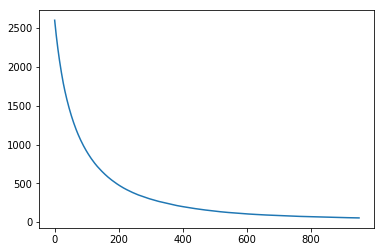

In [138]:
plt.plot(loss[50:])

In [139]:
print("After 1000 interations, the loss function is :",f(v,a,x,y))
print("Now the variable v is :\n",v)
print("The variable a is :",a)

After 1000 interations, the loss function is : 54.05703274872559
Now the variable v is :
 [ 1.54857585  0.84078615  1.4868395   0.37261924  1.39539165 -0.41294061
  0.80911012  1.21223198 -0.61389739 -1.24086304  1.78258813 -0.39833573
  0.45703727  0.29485046 -0.44241329 -0.8475442   0.21264803  1.78649606
 -0.72400566 -1.6828764   1.65866493  2.11096265  1.22697203  0.17252216
  0.78919941  0.19684341  1.58595193  1.63988907  1.68379391  0.11797488]
The variable a is : -2.244320454475963


### 3 Méthode du sous-gradient stochastique
#### Question 3.1
$$E[f_I(v,a)]=\sum_{i=1}^n P_i \times f_i(v,a)=\frac{1}{2}\sum_{j=1}^{m}v_j^2+c\sum_{i=1}^{n} \max (0,1-y_i(x_i^T v+a))=f(v,a)$$

#### Question 3.2
$$\partial f_i(v,a)=v_1 \times v_2 \times ... \times v_p \times \{0\}+n \cdot \partial h(u_i)\times \left(y_i x_i^T \ y_i\right)$$

#### Question 3.3

In [141]:
v=np.zeros(30)
a=0
time=10000
n=y.size
for i in range(time):
    step=1/(i+1)
    rand=np.random.randint(0,n)
    gk=df(v,a,np.tile(x[rand],(n,1)),np.ones(n)*y[rand])
    vt=gk[0:30]
    at=gk[30]
    v=v-step*vt
    a=a-step*at
    print(f(v,a,x,y))

5981177.3428195305
1521050.096036683
692436.6180016234
402091.2292274048
268472.9212634785
196609.35162008528
154127.91876493578
127288.12515814898
96928.10012388843
86319.67584880714
79299.68394426318
74822.91739679142
111722.12335522161
104146.51536123098
98355.12993967814
93847.25834462124
90412.92181806907
101650.45118473822
97601.35153450743
97256.31045674959
111628.1873035441
105119.11459556359
99460.43897127121
88381.20733685022
83938.3330682464
75851.87830670978
72069.3329950711
68718.63533134421
65738.80859826402
63088.223935236536
60697.83144871999
58557.71217407388
56638.03443431615
54906.95299931092
53359.801172238724
51970.5097510616
50740.29586716556
49633.72204167761
48634.162256962045
47738.711554241745
46939.02789093937
46226.8387028635
45588.14064846289
44403.093378374404
43641.58298065716
42947.70907204135
42327.214178519396
43261.88352823099
42503.74086565156
41813.90655784528
41172.841067480316
40584.51519171309
40063.410227247725
39429.0658732463
38845.56414244385

7621.16093706965
7613.723260990793
7606.570014899558
7683.362793851192
7675.5999751252075
7667.907783070032
7660.2855207000985
7652.816388203637
7645.559581335108
7638.369684106726
7631.246037433255
7374.585056809263
7367.712998679198
7360.904694070988
7354.334956675965
7347.936348943214
7341.757432358731
7335.637945814435
7329.577303719968
7323.646028649879
7318.053024423354
7312.602774926458
7307.20726756527
7301.8659607094405
7296.578318888392
7291.343812710208
7286.161918781881
7281.128813359068
7151.884650578239
7145.409949585504
7138.992718385592
7132.632414235716
7126.328500379189
7120.080445968589
7113.887725990044
7107.7498211886905
7307.008015399795
7171.195343870489
7164.546130696343
7157.954759747919
7151.4206949447025
7145.130648820038
7138.912138663064
7010.993781039847
7085.518766251663
7078.848739331811
6909.682353825165
6902.590522911335
6895.556651417879
6888.723302648408
6882.178942174422
6875.700038984227
6869.400344176364
6863.221358268118
6857.263394534519
6851.53

3677.565085306928
3675.6478358184386
3654.9230833497763
3602.5781620113326
3532.324073323674
3529.5847778014763
3526.8563554359953
3524.1387550496147
3521.431925754009
3518.735816948219
3516.0503783167337
3513.3918445738786
3510.8202444479243
3508.297576647344
3505.7851002349717
3503.326397764962
3500.9451726677053
3498.593435147545
3496.2514207072354
3493.9190832868244
3491.5963770859635
3489.283256562198
3486.979676429263
3484.6855916553886
3482.400957461629
3480.125729320195
3477.8598629527996
3475.6033143290188
3473.406411855509
3471.2972813127303
3469.1970667813976
3467.10572606073
3465.0232171862312
3462.9494984281096
3460.884528289758
3458.8282655062258
3456.7806690427055
3454.7416980930275
3442.1631174770255
3439.5685885293174
3436.9838450754423
3434.408842936238
3431.8435381727386
3429.2948498239766
3426.8116679173254
3424.3379228525555
3421.8735720399786
3419.418573120846
3416.9773438686198
3414.6034601106944
3412.2386737303746
3409.8829436756173
3407.5362291164297
3405.19848

2166.471763865261
2165.161598830607
2163.854799985636
2162.5513568001106
2161.2512587836754
2159.954495485673
2158.6610564949715
2157.3709314397847
2156.04068917989
2154.701978050544
2153.3666473859735
2152.034686720628
2150.706085628265
2145.098945937719
2143.663658446187
2142.2318812748704
2140.8036037204956
2139.37881511959
2137.9575048483102
2136.5643153479505
2104.5915221847654
2103.1667851670954
2101.7454967921267
2100.3445969990735
2087.439125936084
2086.0544968888707
2084.6732394111555
2092.1041323480104
2090.6120307817287
2089.123455412182
2087.638395704415
2086.156841162038
2084.6787813270557
2083.2042057797057
2081.7331041382895
2080.265466059006
2078.801281235793
2077.340539400156
2075.883230321009
2074.4293438045142
2063.647297026463
2049.924740941308
2048.4915686548898
2047.0617843929313
2045.6353780890686
2044.2123397135106
2042.7926592728822
2041.376326810073
2039.9717671297326
2038.590664714541
2037.2128404194134
2035.8382845155368
2034.4669873093533
2037.0087280533216

1420.2697010968138
1419.4294815656292
1418.590764379749
1417.753546113889
1416.9178233523614
1416.0835926890431
1415.2508507273483
1414.4195940801922
1413.5898193699586
1412.7615232284725
1411.9347022969682
1411.109353226055
1418.301906170536
1417.4805625991278
1416.664941265541
1415.8507755963922
1415.0380622886703
1414.2267980485656
1413.4169795914408
1412.6086036418003
1411.8016669332571
1410.9961662085057
1410.192098219294
1409.3894597263852
1408.5882474995374
1407.7884583174705
1406.9900889678308
1406.1931362471748
1405.3975969609244
1404.6034679233499
1403.810745957534
1403.0194278953463
1402.2295105774108
1401.440990853082
1400.6538655804113
1399.868131626123
1399.0879457930134
1398.3217209414356
1397.5568600549511
1396.793360063722
1396.0464764892745
1381.5645349773388
1380.7866047077816
1380.0100478786035
1379.2348614143555
1378.4610422480418
1377.6885873210842
1376.9174935832984
1376.1477579928633
1375.3793775163026
1374.6123491284447
1373.8466698124062
1373.0823365595606
137

1032.0216974357622
1031.5944379282685
1031.1779053085575
1030.763412956545
1030.3495459737449
1029.9363031898938
1029.5236834373927
1029.1116855513037
1028.7086250791501
1028.3093304707565
1008.1054143528067
1007.6790571923916
1007.2533313665856
1006.8282357055571
1006.4037690421243
1005.9799302117422
1005.5567180525012
1005.1341314051184
1004.7121691129289
1004.29083002188
1003.8789764323842
1005.6111999718572
1005.1849458774566
1004.7593188483864
1004.3343177291529
1003.9118589283363
1003.4992688928033
1003.087291571359
998.3589511934451
997.9444137026567
997.5304911288721
997.1171823370419
996.7044861946694
996.2924015718071
995.8809273410463
995.4700623775138
995.0598055588625
994.6501557652663
994.2411118794121
993.8326727864942
993.4248373742071
993.0176045327395
992.6109731547663
992.2049421354434
991.6651430840292
991.277125148223
990.8896873783232
990.5028287042985
990.1165480585194
989.7308443757466
989.3457165931299
988.9611636501977
988.5771844888527
988.1937780533653
987.8

775.1849665872821
774.8804765935984
774.5763536694122
774.2725972533725
773.96920678518
773.6661817055897
773.3635214564019
773.0612254804663
772.7592932216731
772.4577241249573
772.156517636291
771.8556732026847
771.5551902721828
771.2550682938622
777.085418471279
776.1702397925536
775.8642877225209
775.5587010121385
775.2534791066862
774.9486214524821
774.6441274968745
774.3399966882416
774.036228475988
773.7328223105455
773.429777643366
773.1270939269239
772.8247706147102
772.522807161234
772.2212030220163
771.9199576535904
771.6190705134987
771.3185410602908
771.0183687535216
770.7221653348706
770.430028898712
770.1382426927603
769.84680618632
769.555718849682
774.0628484647348
773.7601429839531
773.4577951143558
773.1558043180733
772.8541700582283
772.5528917989358
772.2519690053009
771.9514011434152
771.6511876803567
771.3513280841842
771.0518218239387
770.752668369641
770.4538671922851
770.1554177638435
769.8573195572578
769.559572046441
769.2621747062745
768.9651270126037
768.6

613.8836891700037
605.1729904607655
604.9333266138167
604.6938979077244
604.454704041947
604.215744716418
603.9770196315457
603.7385284882134
602.4027434974914
602.1637677891736
601.9250259755294
601.6865177582961
601.4482428396846
601.2102009223746
600.9723917095159
600.7348149047265
600.4974702120915
600.2603573361636
600.023475981961
599.7868258549663
599.550406661127
599.3142181068532
599.0782598990179
605.4603009679349
605.2160728028342
604.972079985093
604.728322217526
604.4847992034134
604.2415106465012
609.6559073398835
609.4152392279341
609.1748035202629
608.9345999233968
608.69462814432
608.4548878904774
608.2153788697708
607.9761007905589
607.7370533616582
607.498236292339
607.2596492923263
607.0212920717997
606.7831643413911
606.5452658121845
606.3075961957147
606.0701552039678
605.8329425493777
605.5959579448289
605.3592011036524
605.1226717396266
604.8863695669755
604.6502943003698
604.4144456549227
604.1788233461925
603.9434270901805
603.7082566033289
603.4733116025216
6

500.0881946022989
499.90258816664976
499.71713656261636
499.53183961942625
499.03217992634774
498.85030834683545
498.6685893406374
498.48702273910527
498.30560837382274
498.12434607660583
497.9432356795005
497.7622770147843
497.5814699149651
497.4008142127801
497.22030974119696
497.0399563334118
496.8597538228503
496.6797020431662
496.4998008282417
496.32005001218647
496.1404494293375
495.96099891425916
495.78169830174187
495.6025474268029
495.4235461246848
495.24469423085634
495.0659915810106
494.88743801106637
494.7090333571661
494.53077745567657
494.35267014318794
494.1747112565144
493.9969006326923
493.81923810898064
493.6417235228616
493.46435671203744
493.2871375144338
493.1100657681964
492.9367263734002
492.7636875355449
492.590793639632
492.4180445263338
492.24544003653955
492.07298001135626
491.90066429210697
491.7284927203318
491.5564651377871
491.38458138644444
491.21284130849136
491.04124474633016
486.10853447832386
485.9341976230345
485.76000547107077
485.58595786432824
48

395.70811986537905
395.57471895801154
395.4414174255783
395.3082151704561
395.1751120951415
395.0427978300085
394.9122561819827
394.78181227414865
394.6514660103149
394.52121729440677
394.39106603046736
394.2610121226577
394.1310554752549
394.00119599265395
393.8714335793664
393.7417681400201
393.6121995793593
393.48272780224545
393.35335271365517
393.2240742186811
393.09489222253256
392.96580663053317
392.8368173481232
392.70792428085764
392.5791273344063
392.45042641455433
392.3218214272017
392.1933122783629
392.0648988741665
391.9365811208559
391.80835892478825
391.680232192435
391.55220083038074
391.42426474532454
391.296423844078
391.1686780335666
391.04102722082865
390.9134713130156
390.78601021739166
393.98877365815554
393.85762322739913
393.72656937731387
393.59561201400743
393.4647510437003
393.3351684512824
393.2072892909839
393.0795049010486
392.9518151891183
392.82422006294735
392.69671943040123
392.56931319945755
392.44200127820443
392.31478357484264
392.1876599976827
392.

335.9436270010174
335.83078486954196
335.71801596610715
335.60532022700653
335.49269758860373
335.3801479873308
335.26767135969027
335.1552676422525
335.0429367716577
334.93067868461475
334.8184933179015
334.70638060836484
334.5943404929199
334.48237290855076
334.37047779230966
334.25865508131756
334.146904712764
334.03522662390617
333.9236207520698
333.81208703464847
333.4138048828809
333.30202518003875
333.19031774071476
333.07868250229757
332.9671194022435
332.85562837807754
332.7442093673919
332.6328623078462
332.5215871371681
332.41038379315296
332.2992522136626
332.18819233662737
332.077204100044
331.9662874419767
331.8554423005567
331.74466861398236
331.63396632051865
331.5233353584973
331.4127756663172
331.3022871824435
331.19186984540795
331.0815235938087
330.9712483663104
330.86104410164415
330.75091073860665
330.6408482160615
330.53085647293784
330.4209354482305
330.3110850810009
330.20130531037586
330.0915960755473
329.98195731577385
329.87238897037884
329.76289097875144
32

284.40085058349996
284.31412263142767
284.22744599526504
284.1408206343373
284.0542465080103
283.96772357569057
283.88125179682453
283.79483113089873
283.7084615374401
283.62214297601594
283.53587540623295
283.4496587877387
283.36349308022
283.2773782434042
283.19131423705795
283.1053010209884
283.019338555042
282.93342679910506
282.847565713104
282.76175525700415
282.675995390811
282.59028607456935
282.5046272683637
282.419018932318
282.3334610265956
282.24943686039734
282.1657085078319
282.08202978095903
281.9984006405069
281.9148210472422
281.83129096197047
281.74781034553655
281.66437915882335
281.5809973627528
281.4976649182854
281.41438178642005
281.3311479281947
281.24796330468536
281.16482787700636
281.0817416063109
280.99870445379037
280.91571638067416
280.8327773482304
280.7498873177654
280.66704625062295
280.5842541081862
280.50151085187514
280.4188164431487
280.33617084350334
280.2535740144736
280.17102591763194
280.0885265145888
280.0060757669921
279.923673636528
279.84132

251.31302359615637
251.2542281999548
251.19546619942136
251.13673756971343
251.078042286011
251.01938032351728
250.96075165745853
250.90215626308336
250.84359411566373
250.78506519049398
250.72656946289172
250.66810690819668
250.60967750177204
250.55128121900313
250.49291803529832
250.43458792608814
250.37629086682665
250.31802683298986
250.25979580007606
250.20159774360692
250.1434326391262
250.0853004622002
250.02720118841773
249.96913479339023
249.91110125275108
249.85310054215674
249.79513263728555
249.73719751383834
249.6792951475386
249.6214255141317
249.56358858938538
249.5057843490898
249.44801276905733
251.09884270096723
251.03795754422282
250.97710614063516
250.91628846546485
250.85550449399466
250.79475420153042
250.7340375634
250.6733545549542
250.61270515156613
250.5520893286312
250.49150706156755
250.4309583258157
250.3704430968384
250.30996135012072
250.24951306117035
250.1890982055172
248.34596219315267
248.28561453389534
248.2253002837204
248.16501941819362
248.1047719

217.4040284566128
217.35467509114645
217.30534727686936
217.25604499632124
217.20676823205687
217.157516966646
217.10829118267287
217.0590908627366
217.9931707372457
217.9414741781106
217.88980390559402
217.83815990190396
217.78654214926328
217.7349506299101
217.68338532609715
217.63184622009285
216.33942120634842
216.2857566602012
216.23211903276678
216.1785083059615
217.7632681895193
217.7139815172005
217.66472022157762
217.6154842853861
217.5662736913759
217.5170884223119
217.46792846097313
217.41879379015379
217.36968439266187
217.32060025132066
227.1669141554084
227.11732279301523
227.0677568154208
227.01821620541924
226.96870094581914
226.91921101944337
226.8697464091296
226.82030709773002
226.77089306811084
226.72150430315327
226.67214078575267
226.6228024988189
226.5734894252764
226.5242015480638
226.47493885013407
226.4257013144548
226.3764889240077
226.32730166178914
226.2781395108095
226.2290024540936
226.17989047468055
226.1308035556237
226.08174167999098
226.0327048308642


204.5158093352418
204.47255080182478
204.42931263484738
204.38609482151094
204.34289734902725
204.2997202046177
204.25656337551405
204.2134268489582
200.29511872813103
200.25298007585312
200.2108613129515
200.16876242691976
200.12668340526085
200.084624235488
200.0425849051239
200.00056540170118
199.9585657127624
199.9165858258596
199.87462572855478
199.83268540841974
199.79076485303582
199.74886404999444
199.7069829868964
195.34067503243242
194.2686903579636
194.2244780388873
194.18028616290945
194.136114717324
194.09196368943523
194.04783306655673
194.00372283601243
193.95963298513584
193.9155635012705
193.87151437176985
193.82748558399695
193.78347712532494
193.7394889831366
193.6955211448247
193.65157359779175
193.60764632944986
193.56373932722144
193.51985257853812
193.47598607084163
193.43213979158338
193.38831372822457
193.34450786823598
193.30072219909852
193.25695670830228
193.2132113833475
193.1694862117441
193.12578118101143
193.08209627867868
193.03843149228484
192.99478680

177.89266043619625
177.85645400860847
177.820263275183
177.784088226769
177.74792885422264
178.3653720861367
178.32902001743508
178.2926836826025
178.25636307247527
178.22005817789682
178.18376898971653
178.14749549879153
178.1112376959844
178.0749955721656
178.03876911821138
178.00255832500486
177.9663631834362
177.9301836844017
177.89401981880462
177.8578715775547
177.82173895156836
177.78562193176867
177.74952050908544
177.71343467445462
177.67736441881948
177.64130973312925
177.60527060834002
177.5692470354147
177.53323900532246
177.49724650903897
177.56594969909034
177.53013605308587
177.49433789070667
177.45855520295626
177.42278798084445
177.3870362153878
177.35129989760952
177.31557901853924
177.27987356921284
177.24418354067316
177.20850892396933
177.1728497101571
175.25378711537337
175.22022550480747
175.1866786527566
175.1531465505789
175.1196291896391
175.08612656130828
175.05263865696355
175.01916546798873
174.98570698577353
174.9522632017141
174.91883410721306
174.8854196

159.51392568253397
159.4842500793775
159.4545866748428
159.42493546222101
159.39529643480745
159.36566958590225
159.33605490881024
159.30645239684083
159.27686204330794
158.71418956090776
158.68402202324137
158.65386675200068
158.62372374048113
158.59359298198208
158.56347446980774
158.53336819726707
158.50327415767356
158.47319234434482
158.44312275060383
158.41306536977746
158.38302019519762
158.35298722020045
158.3229664381267
158.29295784232207
158.26296142613623
158.23297718292372
158.20300510604372
158.1730451888597
158.14309742473992
158.11316180705685
158.0832383291878
158.0533269845145
158.02342776642328
158.90073671025115
158.87207178389133
158.84341859846182
158.81477714753186
158.78614742467425
164.24831878244987
164.2224468691465
164.19658588123133
164.1707358126313
164.14489665727754
164.1190684091053
164.093251062054
164.06744461006733
164.04164904709341
164.01586436708376
163.990090563995
163.96432763178728
163.9385755644252
163.9128343558776
163.8871040001173
163.86138

141.7896345958916
141.76802373314266
141.74642155057808
141.7248280436213
141.70324320769856
141.68166703823928
141.6600995306756
141.63854068044293
141.61699048297947
141.5954489337265
141.5739160281283
141.55239176163212
141.53087612968815
141.50936912774958
141.48787075127257
141.46638099571624
141.4448998565427
141.42342732921702
141.40196340920727
141.38050809198435
141.35906137302234
141.33762324779806
141.31619371179147
141.2947727604853
141.27336038936548
141.2519565939206
141.2305613696424
141.20917471202546
141.1877966165673
141.16642707876852
141.14506609413266
141.1238019349489
141.1032713212826
141.0827490368585
141.0622350772735
141.04172943812728
141.02123211502243
141.00074310356442
140.98026239936164
140.9597899980254
140.9393258951697
140.91887008641157
140.89842256737091
140.8779833336703
140.8575523809354
140.83712970479468
140.81671530087934
140.79630916482364
140.77591129226442
140.7555216788418
140.7351403201983
140.71476721197945
140.69440234983372
140.674045729

134.71376436480088
134.69466490477748
134.67557269481154
134.6564877312904
134.6374100106039
134.61833952914387
134.5992762833044
134.58022026948197
134.56117148407515
134.54212992348468
134.5230955841138
134.50406846236763
134.48504855465367
134.4660358573818
134.44703036696382
134.42803207981387
134.40904099234854
134.39005710098616
134.37108040214775
134.3521108922563
134.33314856773686
134.31419342501704
134.29524546052642
134.27630467069696
134.2573710519626
134.23844460075955
134.21952531352633
134.20061318670363
134.1817082167343
134.16281040006334
134.143919733138
134.12503621240774
134.1061598343241
134.08729059534107
134.06842849191452
134.04957352050243
134.0307256775656
134.01188495956632
133.99305136296937
133.97422488424166
133.95540551985218
133.9365932662724
133.9177881199756
133.89899007743745
133.88019913513574
134.91926025383404
134.89824047008213
134.8772283294124
134.85622382810666
134.83522696244884
134.81423772872512
134.79325612322398
134.7722821422363
134.75131

123.5315027389536
123.51505039682328
123.49860394678305
123.4821633860551
123.46572871186356
123.4492999214339
123.43287701199338
123.41645998077082
125.49072018677724
125.47419249490656
125.45767071132475
125.44115483325045
125.42464485790359
125.40814078250604
125.39164260428113
125.37515032045377
125.35866392825075
125.34218342490018
123.74310174659016
123.72634451448371
123.70959321106486
123.69284783355818
123.67610837918971
123.65937484518737
123.64264722878046
123.62592552719997
123.6092097376786
123.59249985745043
123.57579588375143
123.55909781381895
123.5424056448922
123.52571937421166
123.50903899901972
123.49236451656031
123.4756959240788
123.45903321882236
123.44237639803971
123.425725458981
123.40908039889838
123.39244121504512
123.37580790467646
123.35918046504905
123.3425588934212
123.32594318705277
123.30933334320525
123.29272935914177
123.27613123212694
123.25953895942705
123.24295253830988
123.22637196604505
121.64035403952538
121.62470474609142
121.60906106916181
12

107.57100418131104
107.55517826637511
107.53935757199979
107.523542095881
107.5077318357162
107.49192678920382
107.4761269540437
107.46033232793712
107.44454290858626
107.42875869369487
107.41297968096784
107.39720586811133
107.38143725283271
107.78488846105881
107.76743625849564
107.74998962819363
107.73254856773654
107.71511307470918
107.69768314669791
107.68025878129032
107.66283997607533
107.6454267286432
107.62801903658547
107.61061689749494
107.59322030896585
107.57582926859367
107.55844377397523
107.54106382270865
107.52368941239328
107.50632054062994
107.48895720502063
107.4715994031687
107.45424713267874
107.43690039115684
107.41955917621024
107.70977186015675
107.69317535369935
107.6765841973865
107.6599983888892
107.64341792587972
107.62684280603136
107.61027302701908
107.5937085865188
107.57714948220783
107.56059571176478
107.54404727286942
107.52750416320286
107.5109663804475
107.49443392228692
107.47790678640612
107.46138497049122
107.44486847222964
107.42835728930999
106

99.92429830708227
99.9087371031103
99.89318064430768
99.87762892870937
99.86208195435138
99.84653971927087
99.83100222150584
99.81546945909548
99.79994143007987
99.78441813250014
99.76889956439848
99.75338572381816
99.73787660880332
99.72237221739927
99.70687254765214
99.69137759760929
99.675887365319
99.66040184883055
99.64492104619431
99.62944495546154
99.61397357468464
99.59850690191698
99.58304493521292
99.56758767262782
99.55213511221815
99.5366872520413
99.5212440901556
99.50580562462065
99.49037185349677
99.47494277484552
99.45951838672924
99.44409868721148
99.42868367435666
99.41327334623031
99.39786770089889
99.38246673642993
99.36707045089184
99.35167884235427
99.33629190888757
99.32090964856332
99.27874685178885
99.26364791484511
99.24855357485366
99.23346382991632
99.21837867813582
99.2032981176158
99.188222146461
99.17315076277715
99.15808396467091
99.14302175025003
99.12796411762302
99.11291106489959
99.09786259019032
99.08281869160679
99.06777936726165
99.05274461526838


101.20816554359942
101.19484990273861
101.18153814451433
101.16823026739095
101.15492626983412
99.28595650534456
99.27261325545076
99.25927389420161
99.24593842006004
99.23260683148989
99.21927912695556
99.2059553049225
99.19263536385658
99.17931930222474
99.16600711849455
99.15269881113421
99.13939437861295
99.12609381940057
99.11279713196765
99.09950431478573
99.0862153663267
99.0729302850637
99.05964906947028
99.04637171802082
99.03309822919044
99.01982860145522
99.00656283329172
98.9933009231775
98.98004286959069
98.96678867101024
98.95353832591584
98.9633945083989
98.94951453080263
98.93563853451674
98.92176651798268
98.90789847964292
98.89403441794039
98.88017433131894
98.86631821822327
100.40496890014823
100.39118589377242
100.37740683912264
100.36363173465288
100.34986057881804
100.33609337007364
100.32233010687605
100.30857078768238
100.29481541095048
100.28106397513908
100.26731647870736
100.25357292011562
100.2398332978248
100.22609761029649
100.21236585599311
100.1986380333

In [142]:
print("After 10000 interations, the loss function is :",f(v,a,x,y))
print("Now the variable v is :\n",v)
print("The variable a is :",a)

After 10000 interations, the loss function is : 99.98223954326367
Now the variable v is :
 [-0.24583303  1.14137453 -0.18156265  1.82240474 -0.056836   -2.32174605
  2.69879085  2.56216877 -0.03222177  0.56104743  3.21552064 -0.9844634
  2.25641898  4.38632165  0.63645604 -2.58766777 -1.24865959 -1.20691899
  0.44319672 -0.55141874  2.01194925  2.21594281  1.71842073  4.19423382
  2.18315237 -0.6329995   1.34200856  1.57998322  1.24993467  2.49850841]
The variable a is : 3.0527809576882516


### 4 Méthode du lagrangien augmenté
#### Question 4.1

We could write the lagrangien form like:
$$L_p(v,a,\xi,\phi,\psi)=\frac{1}{2}||V||_2^2+c\sum_{i=1}^n \xi_i + \sum_{i=1}{n}<\phi,-\xi_i>+\frac{p}{2}||\xi||_2^2 +\sum_{i=1}^n <\psi,1-y_i(x_i^T v+a)-\xi_i> + \frac{p}{2}||1-y_i(x_i^T v+a)-\xi_i||_2^2 $$
and we have $$\phi \ge 0,\psi \ge 0 $$
Then we get:

\begin{align*}
\sum_{i=1}^{n}<\phi,-\xi_i>+\frac{p}{2}\|\xi\|_2^2 = & <\phi,-\xi>+\frac{1}{2p}\|p\xi+\phi-\phi\| \\
= & <\phi,-\xi> + \frac{1}{2p}||p\xi+\phi||_2^2 -\frac{1}{p}<p\xi+\phi,\phi>+\frac{1}{2p}||\phi\|_2^2 \\
= & \frac{p}{2}||\xi+\frac{\phi}{p}||_2^2-<\frac{\phi}{p},\phi>+\frac{1}{2p}||\phi\|_2^2 \\
= & -\frac{1}{2p}||\phi\|_2^2  +\frac{p}{2}||\xi+\frac{\phi}{p}||_2^2
\end{align*}

So we could transform the problem as:

$$L_p(v,a,\xi,\phi,\psi)=\frac{1}{2}||v||_2^2+c\sum_{i=1}^n \xi_i + \sum_{i=1}^{n}<\phi,-\xi_i>+\sum_{i=1}{n}g(-\xi_i,\phi_i)+\sum_{i=1}^{n}g(-\xi_i+1-y_i(x_i^T v+a),\psi_i)$$

#### Question 4.2 
\begin{align*}
&\nabla _x g(x,\phi)=p \cdot max (0,x+\frac{\phi}{p}) \\
&\nabla _\phi g(x,\phi)=-\frac{\phi}{p}+max(0,\frac{\phi}{p})=max(-\frac{\phi}{p},x)
\end{align*}


#### Question 4.3
\begin{align*}
&\nabla _x^2 g(x,\phi)=p >0 \\
&\nabla _\phi^2 g(x,\phi)=-\frac{1}{p}<0
\end{align*}
<center> So $x \to g(x,\phi) $ is convex and $\phi  \to g(x,\phi) $ is concave </center>

#### Question 4.4

In [120]:
def get_argmin_Lp(v,a,s,lamda1,lamda2,time):
    if time>100:
        return v,a,s
    n=y.size
    step=0.01
    Lp_a=0
    Lp_v=np.zeros(v.size)
    Lp_v=Lp_v+v
    Lp_s=np.zeros(n)
    for i in range(n):
        u=-s[i]+1-y[i]*(np.dot(x[i],v)+a)
        Lp_a+=-y[i]*2*max(0,u+lamda2/2)
        Lp_v+=y[i]*x[i]*p*max(0,u+lamda2/2)
        Lp_s[i]=1-2*max(0,-s[i]+lamda1/2)-2*max(0,u+lamda2/2)
    value=[Lp_a,np.linalg.norm(Lp_v),np.linalg.norm(Lp_s)]
    loss=np.linalg.norm(value)
    print(u,value,loss)
    print("Nest iteration....")
    if loss<=1:
        print("Congratulation !!!  You have got the answer!")
        return v,a,s
    else:
        v=v-step*Lp_v
        a=a-step*Lp_a
        s=s-step*Lp_s
        return get_argmin_Lp(v,a,s,lamda1,lamda2,time+1)

In [121]:
n=y.size
p=30
v=np.random.rand(p)
a=np.random.random()
s=np.random.rand(n)
lamda1=0
lamda2=0
[v,a,s]=get_argmin_Lp(v,a,s,lamda1,lamda2,0)


-13.370786514783644 [411.55049578325173, 60273.68186437064, 114.19384950989807] 60275.195060100865
Nest iteration....
-1322.5184461027995 [131788.6489874586, 30666032.32642814, 47657.62926107801] 30666352.54058044
Nest iteration....
-61664.92350577381 [26423295.21583223, 24777414475.479614, 29670556.0425437] 24777446329.719547
Nest iteration....
592641284.5998882 [-2279591590.84235, 35593378551764.36, 32263099364.695934] 35593393246968.14
Nest iteration....
1559005871184.447 [191281555242.04443, 7.116746414332453e+16, 56867544104307.26] 7.116748686405572e+16
Nest iteration....
3666455798029493.0 [1.0777403634187644e+16, 1.55948439449053e+20, 1.2118952525561808e+17] 1.559484869104167e+20
Nest iteration....
8.353065517665377e+18 [4.118754566681594e+19, 3.4691621047347564e+23, 2.6849247612543664e+20] 3.469163168170394e+23
Nest iteration....
1.8771681707451675e+22 [1.1347583797874882e+23, 7.732604101458045e+26, 5.98153587680326e+23] 7.732606498221269e+26
Nest iteration....
4.19644120347406

2.4636408918579134e+273 [1.6355584669983849e+274, inf, inf] inf
Nest iteration....
5.492809938915664e+276 [3.646558974117146e+277, inf, inf] inf
Nest iteration....
1.2246493035881453e+280 [8.130184655592228e+280, inf, inf] inf
Nest iteration....
2.730416550831902e+283 [1.8126651180797114e+284, inf, inf] inf
Nest iteration....
6.0875995431619365e+286 [4.0414270640740227e+287, inf, inf] inf
Nest iteration....
1.3572606050389767e+290 [9.010562707541232e+290, inf, inf] inf
Nest iteration....
3.0260800450647614e+293 [2.008949784799215e+294, inf, inf] inf
Nest iteration....
6.74679601333907e+296 [4.479053494036675e+297, inf, inf] inf
Nest iteration....
1.504231737684712e+300 [9.986272605836541e+300, inf, inf] inf
Nest iteration....
3.3537594973738135e+303 [2.226489160954528e+304, inf, inf] inf
Nest iteration....
7.477373654897967e+306 [-inf, nan, inf] nan
Nest iteration....
nan [0.0, nan, 23.83264218872062] nan
Nest iteration....
nan [0.0, nan, 23.831815673197053] nan
Nest iteration....
nan 

F:\AI\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]
F:\AI\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in add
  del sys.path[0]
F:\AI\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]
F:\AI\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
F:\AI\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in subtract


#### Question 4.5

In [85]:
def Lp_lamda(v,a,s,lamda1,lamda2):
    Lp_1=0
    Lp_2=0
    n=y.size
    for i in range(n):
        u=-s[i]+1-y[i]*(np.dot(x[i],v)+a)
        if u>0:
            u=0
        Lp_1+=max(-s[i],-lamda1/2)
        Lp_2+=max(u,-lamda2/2)
    return Lp_1,Lp_2

In [90]:
v=np.random.rand(p)
a=np.random.random()
s=np.random.rand(n)
lamda1=0
lamda2=0
for i in range(10):
    [v,a,s]=get_argmin_Lp(v,a,s,lamda1,lamda2,0)    
    lamda1,lamda2=Lp_lamda(v,a,s,lamda1,lamda2)
print(lamda1,lamda2)

-13.152375916686951 [0.0, 3.1744952003609184, 23.853720883753127] 24.06402750532659
Nest iteration....
-11.633112209105713 [0.0, 2.8570456803248265, 23.62854685138051] 23.800649913969714
Nest iteration....
-10.2557748722826 [0.0, 2.5713411122923437, 23.121163873458652] 23.263705938201127
Nest iteration....
-9.006171269141797 [0.0, 2.3142070010631093, 22.327074872753347] 22.446688540123315
Nest iteration....
-7.871528026315076 [0.0, 2.0827863009567986, 21.26157358510964] 21.363345011736467
Nest iteration....
-6.852453334117352 [0.0, 1.8745076708611186, 19.972616784772864] 20.060388835700767
Nest iteration....
-5.944075688504769 [0.0, 1.6870569037750067, 18.57985962984004] 18.656295046475186
Nest iteration....
-5.1335674693457385 [0.0, 1.5183512133975061, 17.08325313782439] 17.150595563367837
Nest iteration....
-4.409735401616445 [0.0, 1.3665160920577555, 15.425596419117497] 15.486006299732134
Nest iteration....
-3.7627868042711503 [0.0, 1.22986448285198, 13.502074098651164] 13.557970777

-134.24177486385292 [0.0, 0.00045503569680891375, 23.853720883753127] 23.853720888093278
Nest iteration....
-134.1415714250038 [0.0, 0.0004095321271280224, 23.853720883753127] 23.853720887268647
Nest iteration....
-134.0413883300396 [0.0, 0.00036857891441522013, 23.853720883753127] 23.853720886600698
Nest iteration....
-133.9412235445718 [0.0, 0.00033172102297369813, 23.853720883753127] 23.85372088605966
Nest iteration....
-133.84107523765078 [0.0, 0.00029854892067632835, 23.853720883753127] 23.85372088562142
Nest iteration....
-133.74094176142188 [0.0, 0.0002686940286086955, 23.853720883753127] 23.853720885266444
Nest iteration....
-133.64082163281586 [0.0, 0.00024182462574782595, 23.853720883753127] 23.853720884978912
Nest iteration....
-133.54071351707046 [0.0, 0.00021764216317304334, 23.853720883753127] 23.85372088474601
Nest iteration....
-133.44061621289958 [0.0, 0.000195877946855739, 23.853720883753127] 23.853720884557365
Nest iteration....
-133.3405286391458 [0.0, 0.00017629015

-2231129.3497507037 [0.0, 9.94136965829163e-08, 425741784.73266214] 425741784.73266214
Nest iteration....
-4015931.757758487 [0.0, 8.947232692462467e-08, 340593427.7861297] 340593427.7861297
Nest iteration....
-5443773.6841647085 [0.0, 8.05250942321622e-08, 272474742.2289038] 272474742.2289038
Nest iteration....
-6586047.225289682 [0.0, 7.247258480894598e-08, 217979793.78312302] 217979793.78312302
Nest iteration....
-7499866.058189657 [0.0, 6.522532632805138e-08, 174383835.0264984] 174383835.0264984
Nest iteration....
-8230921.1245096335 [0.0, 5.870279369524624e-08, 139507068.02119872] 139507068.02119872
Nest iteration....
-8815765.177565612 [0.0, 5.2832514325721614e-08, 111605654.41695899] 111605654.41695899
Nest iteration....
-9283640.420010392 [0.0, 4.754926289314946e-08, 89284523.53356719] 89284523.53356719
Nest iteration....
-9657940.613966214 [0.0, 4.27943366038345e-08, 71427618.82685375] 71427618.82685375
Nest iteration....
-9957380.769130869 [0.0, 3.851490294345106e-08, 5714209

-11155141.356722835 [0.0, 1.0388301461074032e-11, 1.5775209657553002] 1.5775209657553002
Nest iteration....
-11155141.363336148 [0.0, 9.349471314966628e-12, 1.2620167548318333] 1.2620167548318333
Nest iteration....
-11155141.368626798 [0.0, 8.414524183469966e-12, 1.0096133860930596] 1.0096133860930596
Nest iteration....
-11155141.372859318 [0.0, 7.573071765122969e-12, 0.8076906733296336] 0.8076906733296336
Nest iteration....
Congratulation !!!  You have got the answer!
-11155141.372859318 [0.0, 7.573071765122969e-12, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155141.272859318 [0.0, 6.815764588610672e-12, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155141.172859319 [0.0, 6.134188129749605e-12, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155141.072859319 [0.0, 5.520769316774644e-12, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155140.97285932 [0.0, 4.968692385097179e-12, 23.853720883753127] 23.853720883753127
Nest iterat

Nest iteration....
-11155134.072859345 [0.0, 3.4591967277038776e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.972859345 [0.0, 3.11327705493349e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.872859346 [0.0, 2.801949349440141e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.772859346 [0.0, 2.5217544144961265e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.672859346 [0.0, 2.269578973046514e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.572859347 [0.0, 2.0426210757418628e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.472859347 [0.0, 1.8383589681676764e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.372859348 [0.0, 1.6545230713509087e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.272859348 [0.0, 1.4890707642158178e-15, 23.853720883753127] 23.853720883753127
Nest iteration....
-11155133.172

-902897881189.8331 [0.0, 4.016345573623233e-19, 103142981.82541803] 103142981.82541803
Nest iteration....
-902898313587.7065 [0.0, 3.61471101626091e-19, 82514385.45916969] 82514385.45916969
Nest iteration....
-902898659506.0052 [0.0, 3.2532399146348187e-19, 66011508.36733574] 66011508.36733574
Nest iteration....
-902898936240.6442 [0.0, 2.927915923171337e-19, 52809206.69619807] 52809206.69619807
Nest iteration....
-902899157628.3553 [0.0, 2.6351243308542034e-19, 42247365.35695845] 42247365.35695845
Nest iteration....
-902899334738.5243 [0.0, 2.371611897768783e-19, 33797892.28556676] 33797892.28556676
Nest iteration....
-902899476426.6594 [0.0, 2.1344507079919046e-19, 27038313.829618145] 27038313.829618145
Nest iteration....
-902899589777.1676 [0.0, 1.9210056371927142e-19, 21630651.061365046] 21630651.061365046
Nest iteration....
-902899680457.5741 [0.0, 1.7289050734734428e-19, 17304520.849092036] 17304520.849092036
Nest iteration....
-902899753001.8993 [0.0, 1.5560145661260984e-19, 138

-902900043028.4636 [0.0, 9.749656590519491e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043028.3636 [0.0, 8.774690931467543e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043028.2637 [0.0, 7.897221838320788e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043028.1637 [0.0, 7.107499654488708e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043028.0637 [0.0, 6.396749689039837e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043027.9637 [0.0, 5.757074720135853e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043027.8638 [0.0, 5.1813672481222686e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043027.7638 [0.0, 4.6632305233100414e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043027.6638 [0.0, 4.196907470979037e-23, 23.853720883753127] 23.853720883753127
Nest iteration....
-902900043027.5638 [0.0, 3.7772167238811336e

-7.24069106972263e+16 [0.0, 1.1319966215876818e-26, 3.215693925296359e+16] 3.215693925296359e+16
Nest iteration....
-7.254171959940838e+16 [0.0, 1.0187969594289136e-26, 2.572555140237056e+16] 2.572555140237056e+16
Nest iteration....
-7.264956672115405e+16 [0.0, 9.169172634860222e-27, 2.0580441121896136e+16] 2.0580441121896136e+16
Nest iteration....
-7.273584441855058e+16 [0.0, 8.2522553713742e-27, 1.6464352897516752e+16] 1.6464352897516752e+16
Nest iteration....
-7.280486657646779e+16 [0.0, 7.42702983423678e-27, 1.317148231801355e+16] 1.317148231801355e+16
Nest iteration....
-7.286008430280157e+16 [0.0, 6.684326850813102e-27, 1.0537185854410838e+16] 1.0537185854410838e+16
Nest iteration....
-7.290425848386859e+16 [0.0, 6.015894165731792e-27, 8429748683528513.0] 8429748683528513.0
Nest iteration....
-7.29395978287222e+16 [0.0, 5.414304749158612e-27, 6743798946822804.0] 6743798946822804.0
Nest iteration....
-7.29678693046051e+16 [0.0, 4.8728742742427506e-27, 5395039157458086.0] 539503915

-7.308095518952832e+16 [0.0, 3.0532394629777278e-30, 887756845.5755374] 887756845.5755374
Nest iteration....
-7.308095519324998e+16 [0.0, 2.747915516679955e-30, 710205777.0173131] 710205777.0173131
Nest iteration....
-7.308095519622733e+16 [0.0, 2.4731239650119597e-30, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 2.2258115685107637e-30, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 2.0032304116596874e-30, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 1.8029073704937186e-30, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 1.6226166334443466e-30, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 1.460354970099912e-30, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 1.3143194730899209e-30, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.3080

-7.308095519622733e+16 [0.0, 6.670549666676351e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 6.003494700008716e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 5.403145230007844e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 4.8628307070070606e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 4.376547636306354e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 3.9388928726757185e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 3.545003585408147e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 3.190503226867332e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.308095519622733e+16 [0.0, 2.871452904180599e-34, 23.853720883753127] 23.853720883753127
Nest iteration....
-7.30809

-5.915147559050396e+21 [0.0, 2.221223908972638e-37, 2.0621432472851476e+18] 2.0621432472851476e+18
Nest iteration....
-5.915156204004605e+21 [0.0, 1.999101518075374e-37, 1.6497145978081083e+18] 1.6497145978081083e+18
Nest iteration....
-5.915163119967971e+21 [0.0, 1.7991913662678365e-37, 1.3197716782264763e+18] 1.3197716782264763e+18
Nest iteration....
-5.915168652738664e+21 [0.0, 1.619272229641053e-37, 1.055817342601191e+18] 1.055817342601191e+18
Nest iteration....
-5.915173078955218e+21 [0.0, 1.4573450066769477e-37, 8.446538740709478e+17] 8.446538740709478e+17
Nest iteration....
-5.915176619928462e+21 [0.0, 1.311610506009253e-37, 6.757230992767683e+17] 6.757230992767683e+17
Nest iteration....
-5.915179452707056e+21 [0.0, 1.1804494554083275e-37, 5.4057847942141466e+17] 5.4057847942141466e+17
Nest iteration....
-5.915181718929932e+21 [0.0, 1.0624045098674947e-37, 4.324627835371317e+17] 4.324627835371317e+17
Nest iteration....
-5.915183531908233e+21 [0.0, 9.561640588807454e-38, 3.459702